In [1]:
import sys
sys.path.insert(0, '..')

from multipliers import RSRBinaryMultiplier, RSRTernaryMultiplier, NaiveMultiplier

import math
import numpy as np
import tracemalloc

In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [6]:
n_s = [2**i for i in range(11, 17)]

In [9]:
k_optimals = {
    "rsrpp" : [5, 6, 8, 8, 9, 10],
    "rsr": [4, 4, 5, 6, 6, 6]
}

In [7]:
binary_matrices = [generate_random_binary_matrix(n) for n in n_s]

In [10]:
naive_usage = [NaiveMultiplier(A) for A in binary_matrices]
rsr_usage = [RSRBinaryMultiplier(A, k=k_optimals.get("rsr")[i]) for i, A in enumerate(binary_matrices)]

Total memory for blocks_permutations: 9809064 bytes
Total memory for blocks_permutations: 36423016 bytes
Total memory for blocks_permutations: 116172312 bytes
Total memory for blocks_permutations: 386489032 bytes
Total memory for blocks_permutations: 1488983184 bytes
Total memory for blocks_permutations: 5841100456 bytes


In [11]:
naive_binary_memory = [sys.getsizeof(A) / (1024 ** 2) for A in binary_matrices]

In [12]:
rsr_binary_memory = [i/(1024 ** 2) for i in [9809064, 36423016, 116172312, 386489032, 1488983184, 5841100456]]

In [13]:
rsr_binary_memory

[9.354652404785156,
 34.735694885253906,
 110.7905502319336,
 368.5846633911133,
 1420.0050201416016,
 5570.507484436035]

In [14]:
rsr_memory_peak = [n + a for n,a in zip(naive_binary_memory, rsr_binary_memory)]

In [15]:
rsr_memory_peak, naive_binary_memory

([41.354774475097656,
  162.7358169555664,
  622.7906723022461,
  2416.584785461426,
  9612.005142211914,
  38338.50760650635],
 [32.0001220703125,
  128.0001220703125,
  512.0001220703125,
  2048.0001220703125,
  8192.000122070312,
  32768.00012207031])

In [22]:
ratio = [n/r for r,n in zip(rsr_binary_memory, naive_binary_memory)]

In [23]:
ratio

[3.4207708299181245,
 3.6849736990478767,
 4.6213338682628615,
 5.556389957270508,
 5.768993775284973,
 5.882408418555026]

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

In [25]:
binary_df = pd.DataFrame({"rsr_final": rsr_binary_memory,"rsr_peak": rsr_memory_peak, "naive": naive_binary_memory, "ratio": ratio, "vector_lengths": n_s})

In [26]:
def plot(df, filename: str):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

    vector_lengths = df['vector_lengths']  # Length of each vector
    speedup = df['ratio']
    naive_times = df['naive']
    rsr_current = df['rsr_final']
    rsr_peak = df['rsr_peak']
    # Create the plot with improved aesthetics
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(10, 7))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(vector_lengths, naive_times, label='NumPy', marker='o')
    plt.plot(vector_lengths, rsr_current, label='RSR (final usage)', marker='o')
    plt.plot(vector_lengths, rsr_peak, label='RSR (peak usage)', marker='o')


    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(vector_lengths)):
        plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_current[i]], 
                color='black', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(vector_lengths):
        plt.text(length, (naive_times[i] + rsr_current[i]) / 2, f"{speedup[i]:.2f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    plt.xlabel('$n$')
    plt.ylabel('Memory Usage (MB)')
    # plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
    plt.legend()

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


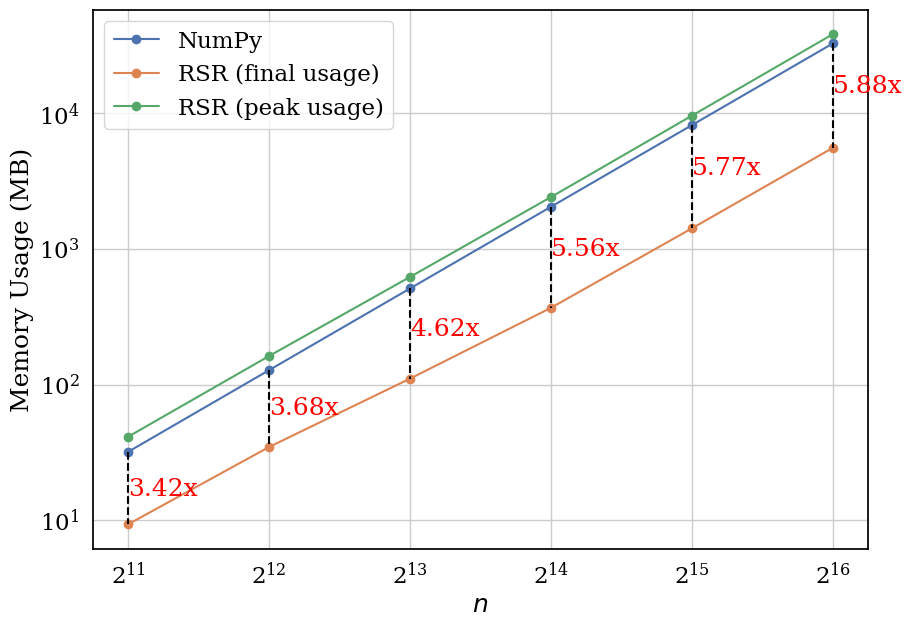

In [27]:
plot(binary_df, "figures/memory_binary")